# BDM 2053 - Big Data Algorithms and Statistic 02

# Final Project

## Group Members:

## 1.	Husanpreet Singh Gill
## 2    Prashant Varshney			  
## 3.	Taranjeet Singh
## 4.   Yogesh Kumar

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='once')

## Data extraction

In [2]:

df = pd.read_csv(r"C:/Users/Yogi/Downloads/Life Expectancy Data.csv")
data = df.copy()
print(data.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

## Data pre-processing

In [3]:
#Lets check Dtypes of columns
print(data.info())
#checking missing/null values in all columns
print(df.isnull().sum().sort_values())
#filling missing values with mean value
data.fillna(data.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

C:\Users\Yogi\AppData\Local\Temp/ipykernel_30164/2777151681.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Lets check object dtypes i.e. categorical variables
print(data.select_dtypes(include=['object']))
#we can drop country column
data.drop(columns=['Country'],inplace=True)
#lets check counts of disticnt values count in Status column
print(data["Status"].value_counts())
#lets apply label encoding to status column such that Developed countries (Developed) = 0 and Developing = 1.
label_encoder =LabelEncoder()
data['Status']= label_encoder.fit_transform(data['Status'])
print(data.head())

          Country      Status
0     Afghanistan  Developing
1     Afghanistan  Developing
2     Afghanistan  Developing
3     Afghanistan  Developing
4     Afghanistan  Developing
...           ...         ...
2933     Zimbabwe  Developing
2934     Zimbabwe  Developing
2935     Zimbabwe  Developing
2936     Zimbabwe  Developing
2937     Zimbabwe  Developing

[2938 rows x 2 columns]
Developing    2426
Developed      512
Name: Status, dtype: int64
   Year  Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015       1              65.0            263.0             62     0.01   
1  2014       1              59.9            271.0             64     0.01   
2  2013       1              59.9            268.0             66     0.01   
3  2012       1              59.5            272.0             69     0.01   
4  2011       1              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0         

In [6]:
#Now all values are in int or float dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int32  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

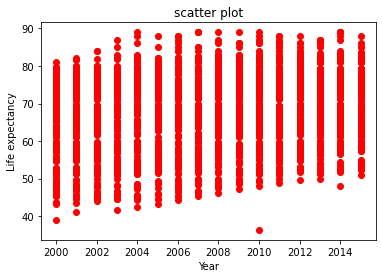

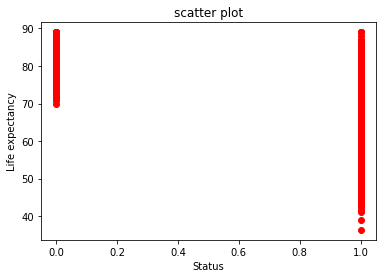

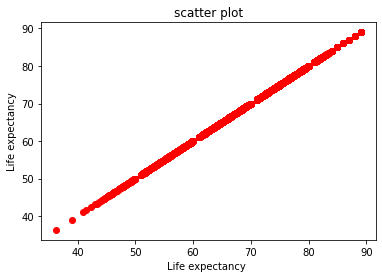

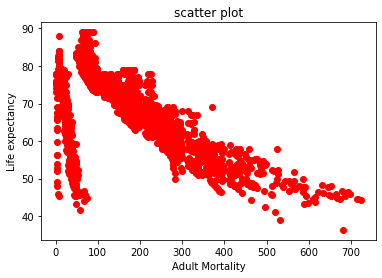

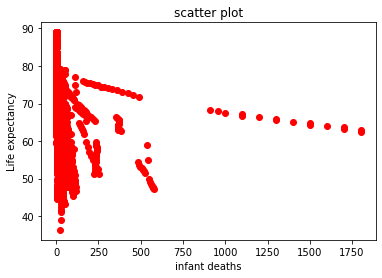

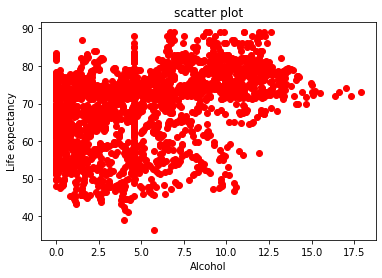

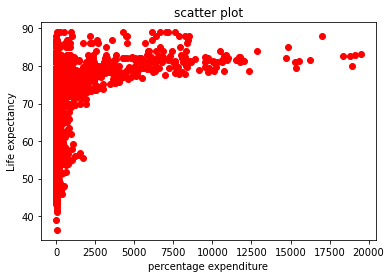

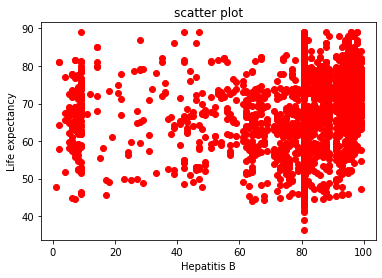

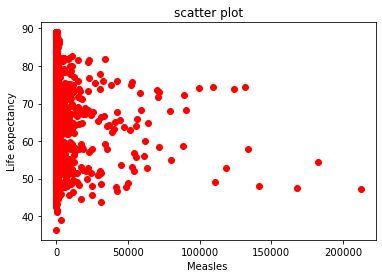

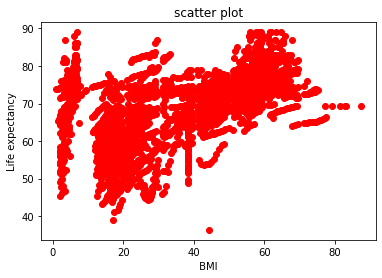

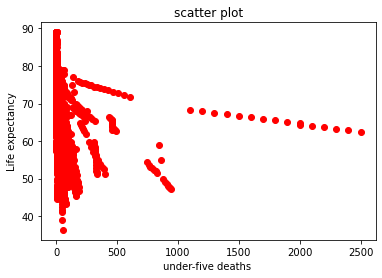

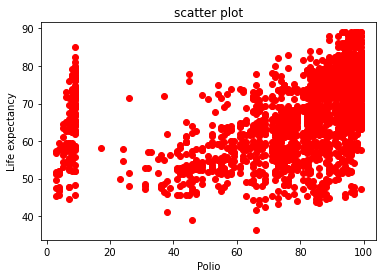

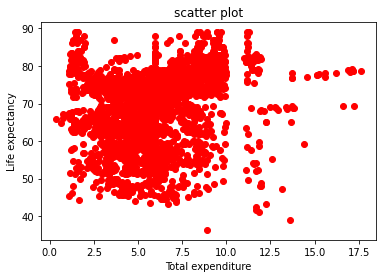

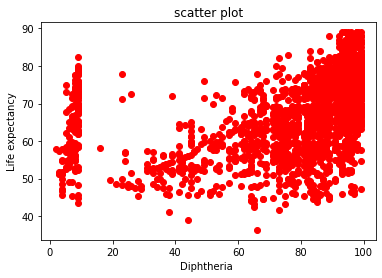

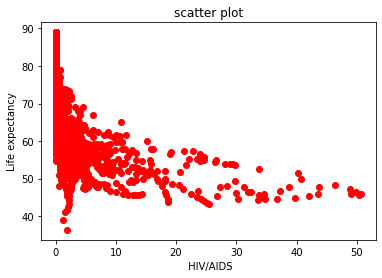

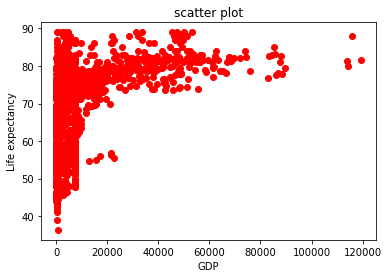

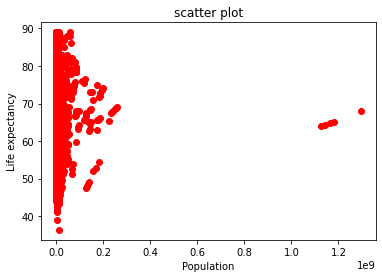

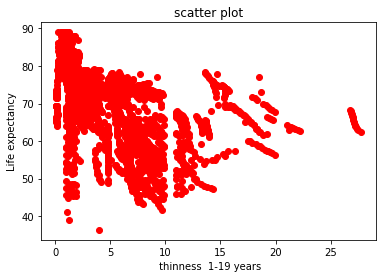

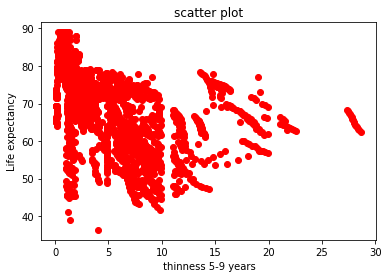

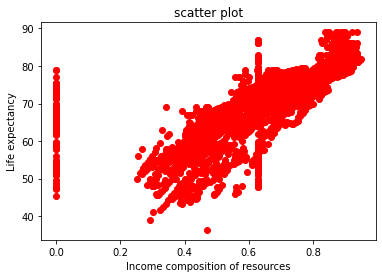

In [7]:
#scatter plot between target and features
for i in range(len(data.columns)-1):
    plt.scatter(x=data.iloc[:,i],y=data.loc[:,data.columns[2]],color=["red"])
    plt.title('scatter plot') # Title label
    plt.xlabel(data.columns[i]) # Title label
    plt.ylabel("Life expectancy")
    plt.show()
    plt.close()

C:\Users\Yogi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yogi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yogi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

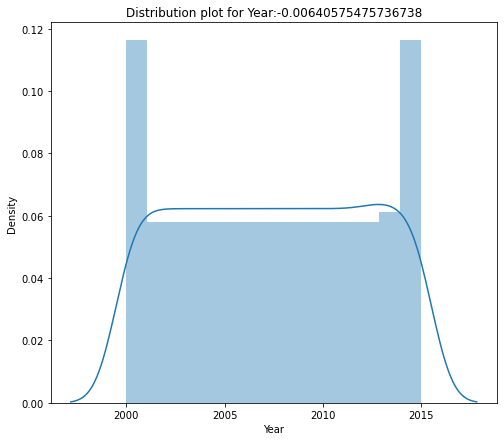

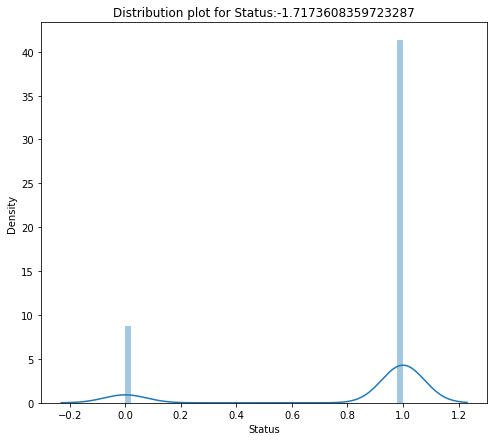

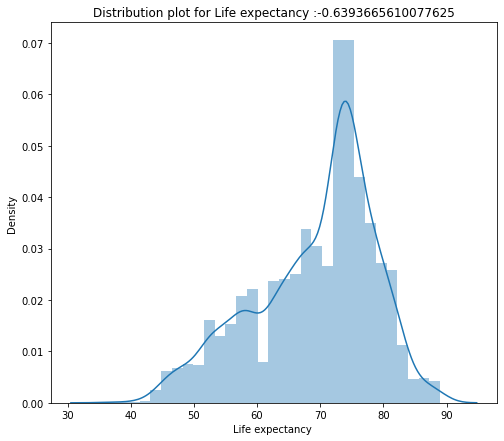

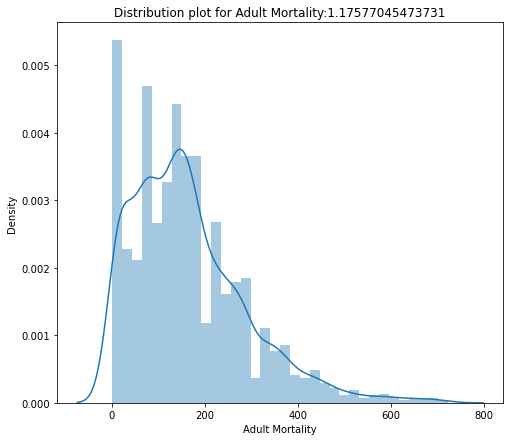

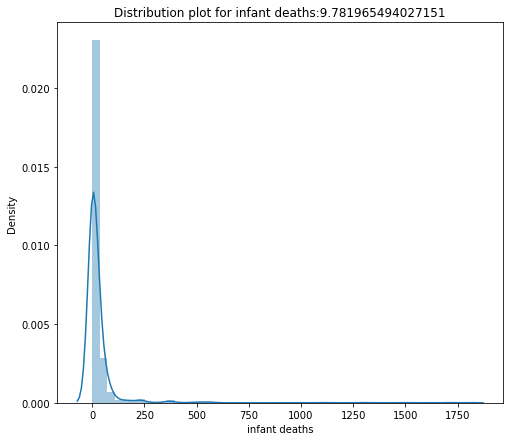

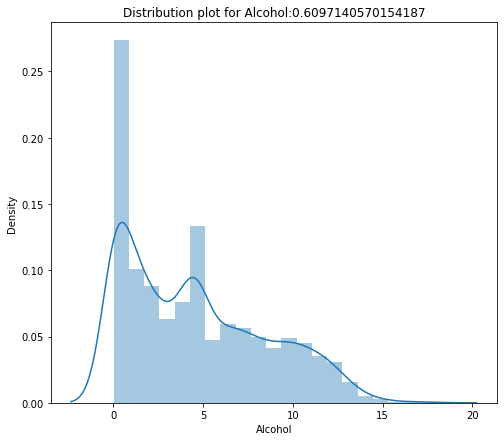

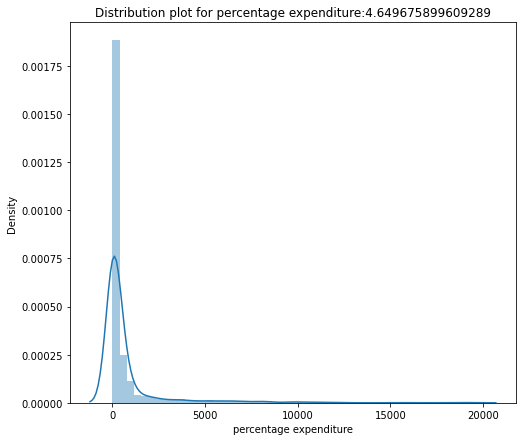

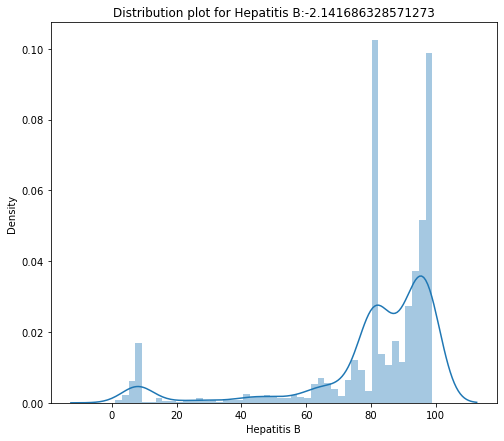

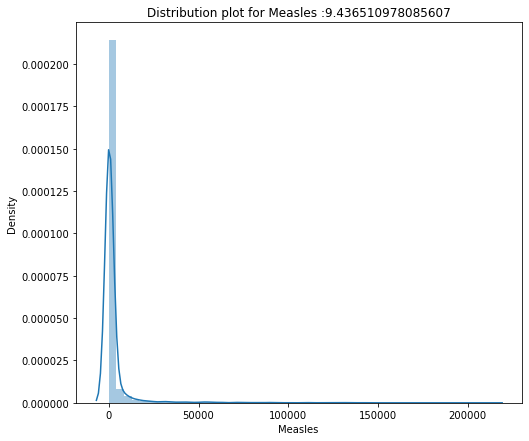

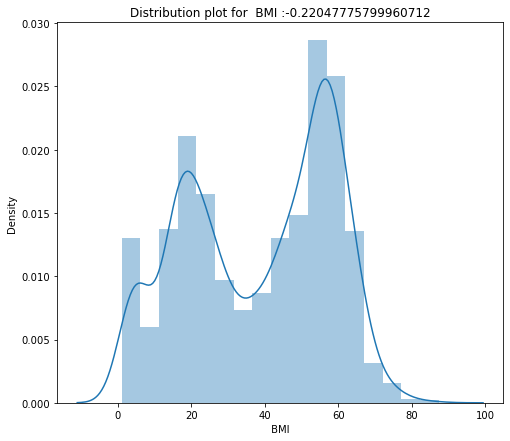

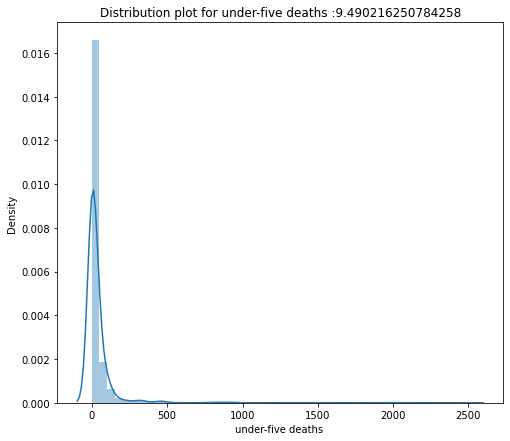

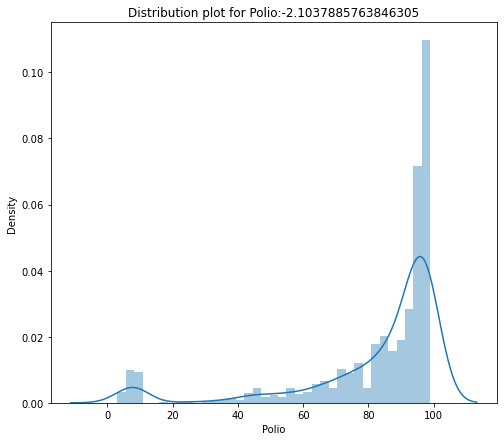

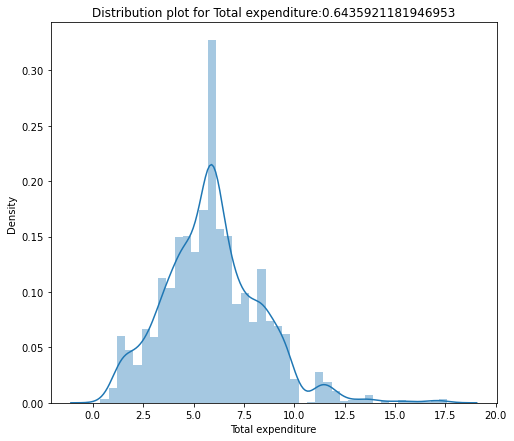

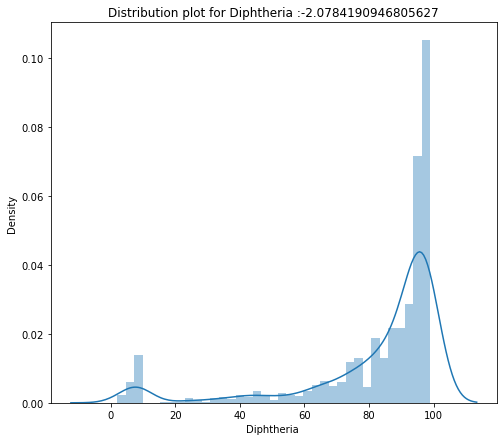

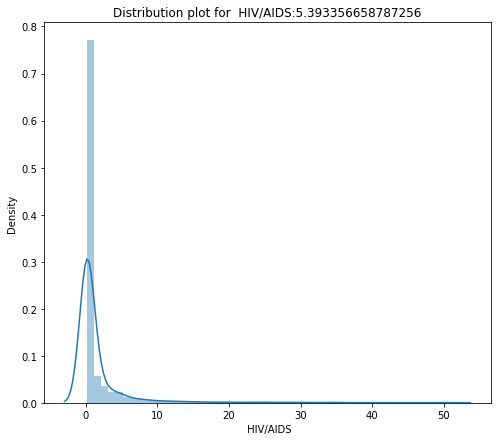

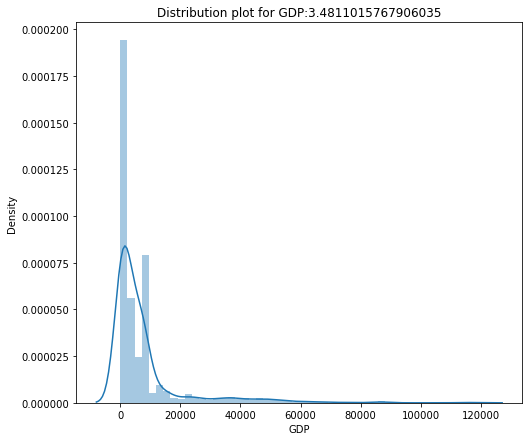

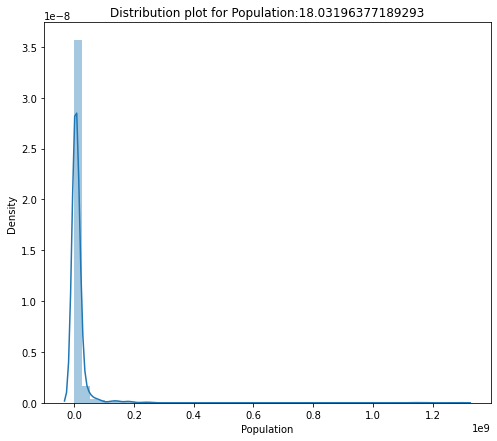

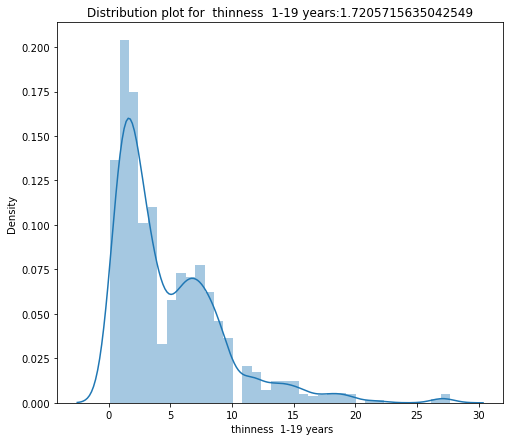

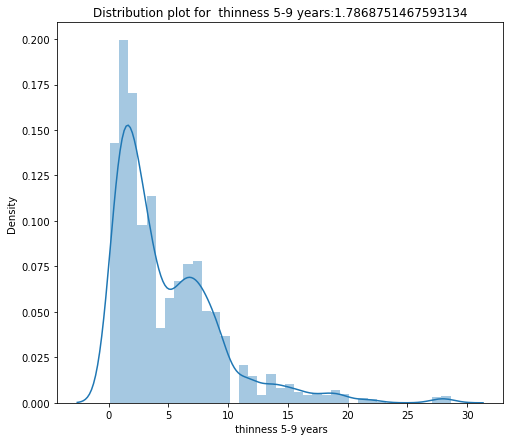

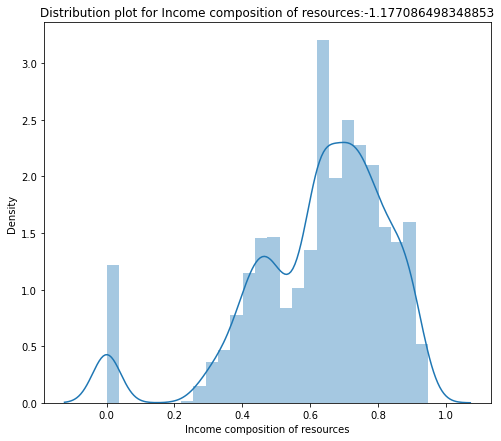

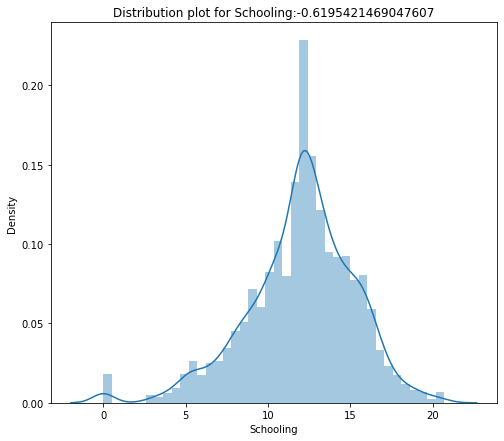

In [8]:
#checking Skewness
from scipy.stats import skew
for i in data.columns:
    plt.figure(figsize=(8,7))
    sns.distplot(data[i]);
    plt.title(f"Distribution plot for {i}:{skew(data[i])}")


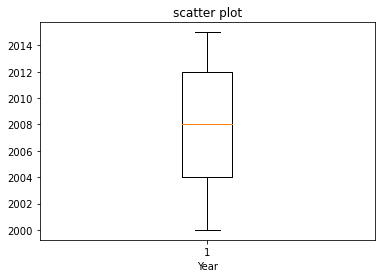

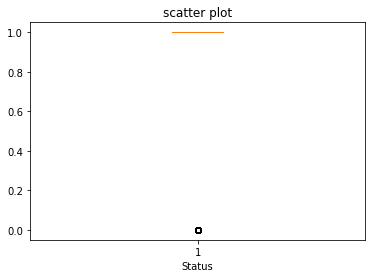

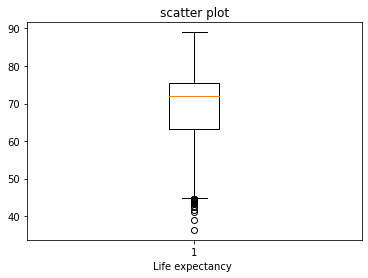

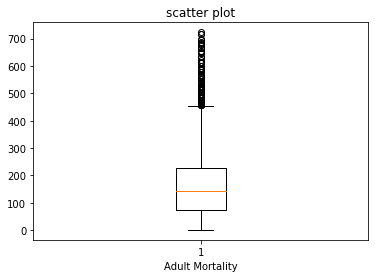

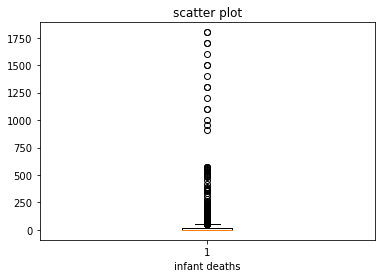

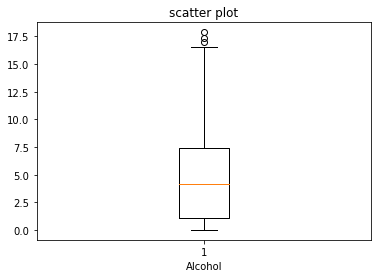

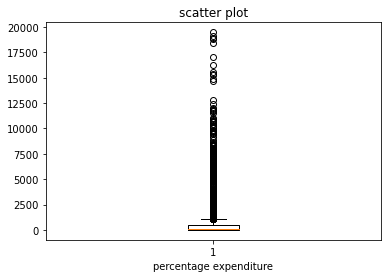

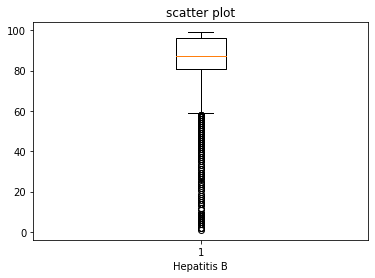

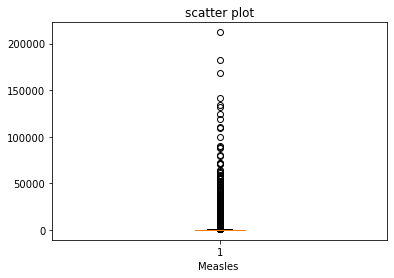

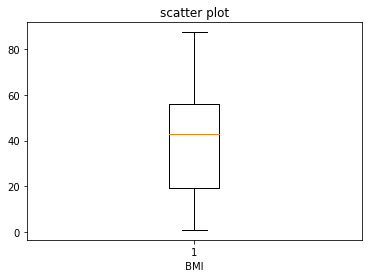

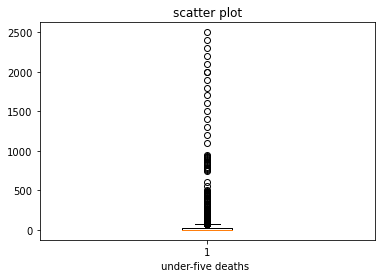

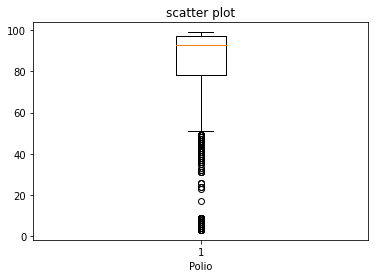

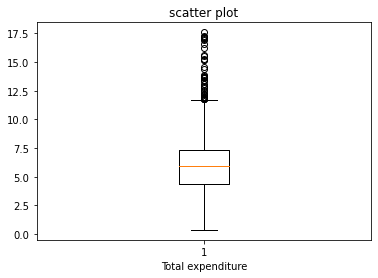

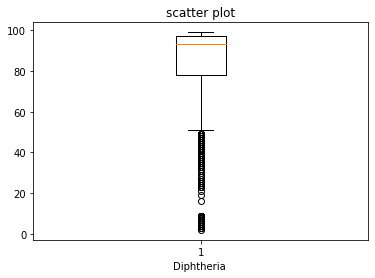

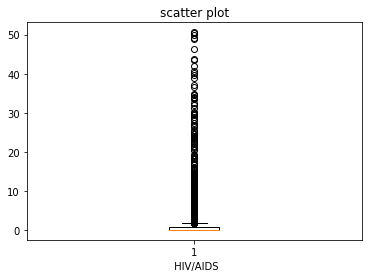

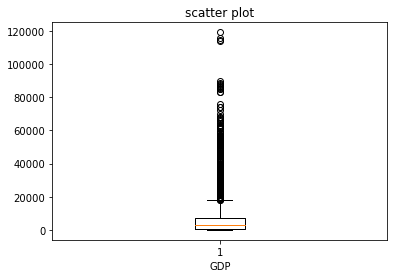

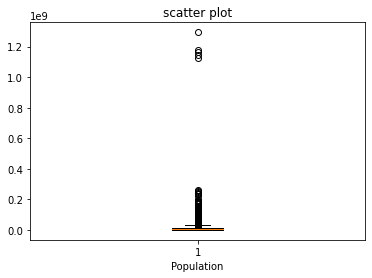

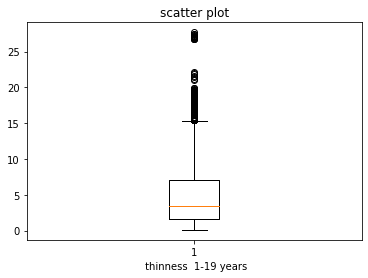

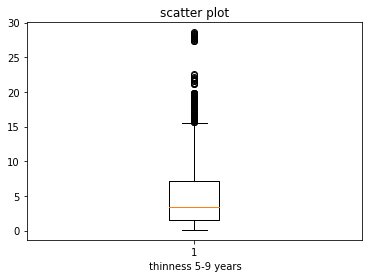

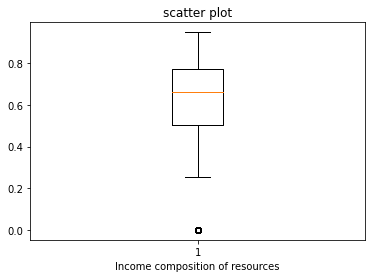

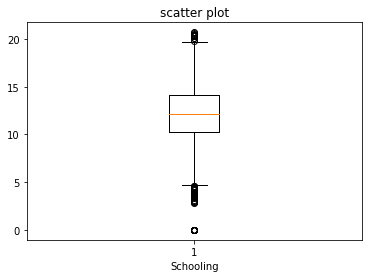

In [9]:
for i in data.columns:
    plt.boxplot(data.loc[:,i])
    plt.title('scatter plot') # Title label
    plt.xlabel(i) # Title label
    plt.show()
    plt.close()

In [10]:
#removing outliers

for i in data.columns.drop('Status'):
    upper=[]
    lower=[]
    Q1 = np.percentile(data[i], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[i], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper_bound = data[i] >= (Q3+1.5*IQR)
    lower_bound = data[i] <= (Q1-1.5*IQR)
    upper_points = np.where(upper_bound)
    upper.append(upper_points)
    a=len(upper_points[0])
    data.drop(upper[0][0],axis=0,inplace=True,errors='ignore')
    lower_points = np.where(lower_bound)
    lower.append(lower_points)
    b=len(lower_points[0])
    data.drop(lower[0][0],axis=0,inplace=True,errors='ignore')
    print(f"{a+b} Outliers has been removed from {i}")

0 Outliers has been removed from Year
17 Outliers has been removed from Life expectancy 
73 Outliers has been removed from Adult Mortality
362 Outliers has been removed from infant deaths
1 Outliers has been removed from Alcohol
329 Outliers has been removed from percentage expenditure
227 Outliers has been removed from Hepatitis B
374 Outliers has been removed from Measles 
0 Outliers has been removed from  BMI 
222 Outliers has been removed from under-five deaths 
170 Outliers has been removed from Polio
32 Outliers has been removed from Total expenditure
172 Outliers has been removed from Diphtheria 
277 Outliers has been removed from  HIV/AIDS
141 Outliers has been removed from GDP
79 Outliers has been removed from Population
51 Outliers has been removed from  thinness  1-19 years
53 Outliers has been removed from  thinness 5-9 years
59 Outliers has been removed from Income composition of resources
83 Outliers has been removed from Schooling


In [11]:
data.corr()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.011366,0.164005,-0.076374,-0.045688,-0.071030,0.034848,0.102480,-0.110461,0.133513,...,0.090144,0.106582,0.103149,-0.145469,0.097716,0.012207,-0.089119,-0.072281,0.249891,0.208174
Status,-0.011366,1.000000,-0.495498,0.326181,0.115707,-0.585678,-0.477269,-0.052177,0.094791,-0.303161,...,-0.208264,-0.372549,-0.226046,0.129532,-0.475993,0.033306,0.389630,0.397288,-0.450591,-0.495135
Life expectancy,0.164005,-0.495498,1.000000,-0.673634,-0.253288,0.370409,0.355447,0.187070,-0.201377,0.517265,...,0.418476,0.207360,0.401397,-0.546902,0.410698,0.024138,-0.439567,-0.437056,0.649381,0.672297
Adult Mortality,-0.076374,0.326181,-0.673634,1.000000,0.173550,-0.162883,-0.227816,-0.115608,0.161008,-0.375580,...,-0.238711,-0.135828,-0.228345,0.411109,-0.267611,-0.022491,0.282275,0.292332,-0.409636,-0.427153
infant deaths,-0.045688,0.115707,-0.253288,0.173550,1.000000,-0.134152,-0.089506,-0.089594,0.370696,-0.200510,...,-0.169300,-0.089058,-0.148411,0.057952,-0.102434,0.247272,0.296992,0.322763,-0.152331,-0.226119
Alcohol,-0.071030,-0.585678,0.370409,-0.162883,-0.134152,1.000000,0.302934,0.046222,-0.039380,0.260721,...,0.200754,0.340988,0.204059,-0.006932,0.281095,0.004348,-0.434686,-0.432351,0.363462,0.436989
percentage expenditure,0.034848,-0.477269,0.355447,-0.227816,-0.089506,0.302934,1.000000,0.043182,-0.063583,0.194150,...,0.147190,0.156570,0.135352,-0.084299,0.878848,-0.038732,-0.236885,-0.244668,0.366281,0.352960
Hepatitis B,0.102480,-0.052177,0.187070,-0.115608,-0.089594,0.046222,0.043182,1.000000,-0.090134,0.085914,...,0.361795,0.007690,0.464577,-0.085151,0.083633,-0.002891,-0.024351,-0.047936,0.151482,0.132325
Measles,-0.110461,0.094791,-0.201377,0.161008,0.370696,-0.039380,-0.063583,-0.090134,1.000000,-0.171651,...,-0.136443,-0.046433,-0.117197,0.051684,-0.081032,0.074346,0.167187,0.187127,-0.123832,-0.146988
BMI,0.133513,-0.303161,0.517265,-0.375580,-0.200510,0.260721,0.194150,0.085914,-0.171651,1.000000,...,0.221229,0.246780,0.174505,-0.225014,0.230726,-0.025497,-0.539277,-0.559414,0.406856,0.429539


<AxesSubplot:>

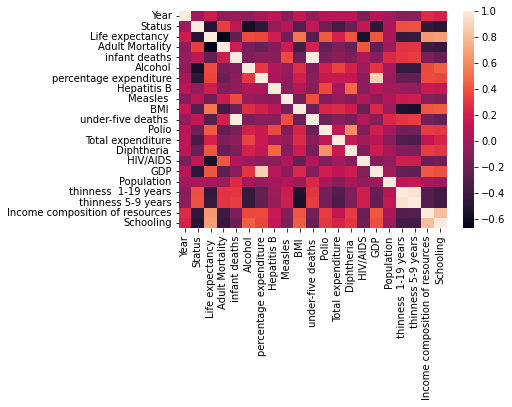

In [12]:
#Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' in the Life Expectation data.
corr=data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
#here scaling data for better results
#scaling data here
scaler_transform = StandardScaler()
scaled_data = scaler_transform.fit_transform(data)
scaled_df = pd.DataFrame(data=scaled_data , columns = data.columns)
print(scaled_df)

          Year    Status  Life expectancy   Adult Mortality  infant deaths  \
0    -0.751536  0.457569          0.335894        -1.217785      -0.277778   
1    -0.310482  0.457569          0.380656        -0.211563       0.023476   
2    -0.751536  0.457569          0.257561        -1.244035       0.007621   
3    -1.192591  0.457569          0.179228        -0.097816       0.023476   
4     1.674264  0.457569          0.716369        -1.252784      -0.293634   
...        ...       ...               ...              ...            ...   
1260 -0.089954  0.457569         -2.618379        -0.780297       0.166176   
1261 -0.310482  0.457569         -2.752664        -1.305283       0.150320   
1262 -1.192591  0.457569         -2.819807        -0.727799       0.102754   
1263 -1.413118  0.457569         -2.763855         4.635805       0.102754   
1264 -1.633645  0.457569         -2.685522         4.452060       0.086898   

       Alcohol  percentage expenditure  Hepatitis B  Measles   

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['pc'+str(x+1) for x in range(scaled_df.shape[1])])
print(principalDf)
print(pca.explained_variance_ratio_)

           pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    -1.108074 -0.829688 -0.663364  0.620290  0.688602 -0.935672  0.716673   
1     0.519532  0.266025 -0.122607  1.172636 -1.456930 -0.747264 -1.069162   
2     0.286846 -0.127604 -0.972349  0.660166 -0.835199 -1.003394  0.186280   
3     0.817417 -0.124783 -0.679151  0.340221 -0.389713 -1.144960  0.240375   
4    -1.697170 -0.120922 -1.327244  0.819683 -0.330739  1.131623  0.127429   
...        ...       ...       ...       ...       ...       ...       ...   
1260  3.097732 -0.774568  0.940492 -1.870498  0.785204  0.747586 -0.734491   
1261  3.690079 -0.695884  2.281617 -1.486609 -0.105313  0.627343 -1.351596   
1262  2.569376 -1.579918  2.915631 -2.536871  2.741872  0.740606 -0.703024   
1263  4.127948 -1.770643  3.261108 -3.909307  3.938246  1.918064 -0.610271   
1264  5.271815 -1.044132  1.918285 -5.081894  3.376527  1.783688 -1.903805   

           pc8       pc9      pc10  ...      pc12      pc13    

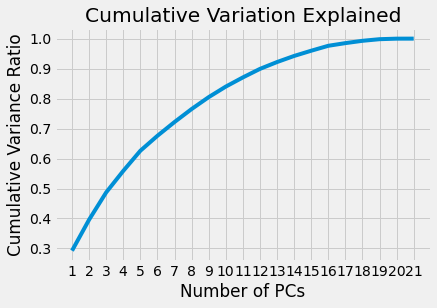

First 9 principal components explain 80% variance in data


In [15]:
cum_importance_pca = np.cumsum(pca.explained_variance_ratio_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 22), cum_importance_pca)
plt.xticks(range(1, 22))
plt.title("Cumulative Variation Explained")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Variance Ratio")
plt.show()
plt.close()
print("First 9 principal components explain 80% variance in data")

C:\Users\Yogi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


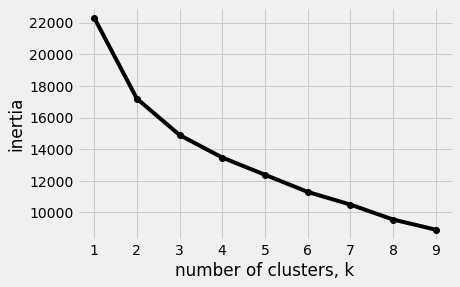

[array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 2, 2, 2]), array([2, 2, 2, ..., 1, 1, 1]), array([4, 4, 4, ..., 0, 0, 0]), array([0, 0, 0, ..., 1, 1, 1]), array([1, 1, 1, ..., 5, 0, 0]), array([3, 6, 3, ..., 0, 0, 0]), array([3, 6, 3, ..., 2, 2, 2])]
Optimal number of clusters : 4


In [16]:
from sklearn.cluster import KMeans
clusters = range(1, 10)
inertias = []
y_kmeans=[]
for k in clusters:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    y_kmeans.append(model.fit_predict(principalDf.iloc[:,:10]))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(clusters, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()
print(y_kmeans)
print("Optimal number of clusters : 4")

In [17]:
x = principalDf

y= data[["Life expectancy "]]

print( model.labels_)

[3 6 3 ... 2 2 2]


In [18]:

#spliting data in train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Linear Regression

In [19]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

## y = b0 + b1*x1+b2*x2+b3*x3+b4*x4+b5*x5+....  is our linear regression model

In [20]:

b1 = linear_reg.coef_
print("b1: ", b1)

b1:  [[-3.01263225  0.79392008 -1.3984546   1.56187775 -1.24410359 -1.2582372
  -0.56427092 -1.01015859 -0.37158332  0.10645408  0.14696645 -0.397134
  -0.20849806  0.0602047   0.10225689  0.49709442  2.49237423 -7.25517611
  -1.27806012  0.27705128  0.30255214]]


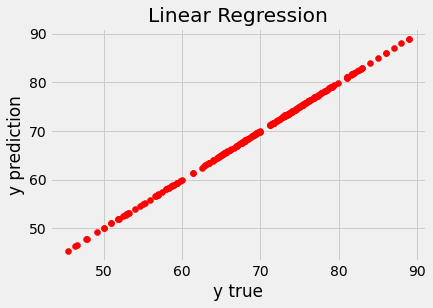

Mean Absolute Error:  1.1907909879932114e-14
Mean Squared Error:  2.258948413496121e-28
Root Mean Squared Error:  1.5029798446739468e-14


In [21]:

y_pred = linear_reg.predict(X_test)                                 
plt.scatter(y_test,y_pred,color="red")
plt.xlabel("y true")
plt.ylabel("y prediction")
plt.title("Linear Regression")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



In [22]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)

print("Accuracy for our testing dataset: {:.3f}%".format(score*100) )

Accuracy for our testing dataset: 100.000%


# Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor 
DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_train,y_train)                # fitted model according to train values
print(DT_reg.predict(X_test))            

[73.2 78.7 69.8 81.  58.6 52.2 82.5 65.4 75.6 72.1 65.8 81.5 56.3 85.
 73.9 67.6 75.6 62.2 56.8 78.7 68.3 62.3 75.8 75.6 69.1 55.7 81.3 52.
 69.1 88.  58.5 69.3 75.8 68.3 76.4 85.  62.6 48.4 77.3 64.1 76.6 74.5
 45.3 75.6 68.3 75.6 56.8 72.5 65.8 75.  68.1 64.1 67.9 74.3 75.4 74.6
 59.7 58.9 70.  79.2 73.6 64.2 75.1 75.8 72.2 76.6 48.1 72.9 65.9 73.5
 81.1 72.1 69.5 89.  74.5 68.3 73.7 68.  75.1 74.9 89.  82.  59.1 75.8
 56.7 72.7 67.8 52.9 73.8 72.5 57.4 53.2 82.5 62.5 62.8 81.2 76.5 65.8
 72.7 72.5 59.4 64.9 67.4 73.8 89.  71.3 63.2 76.5 69.6 75.8 79.5 79.5
 73.9 52.5 88.  65.4 62.5 53.1 81.7 66.7 52.7 75.  66.  71.7 56.2 74.2
 75.  82.  65.4 73.5 71.4 74.5 73.6 78.9 75.  74.9 55.  71.1 59.7 62.1
 75.3 64.4 75.4 73.  61.3 49.8 59.8 76.5 77.5 83.2 75.  78.4 81.3 73.8
 51.2 73.1 63.7 82.4 74.8 63.8 69.5 52.9 74.2 78.  66.7 77.5 74.6 78.2
 74.7 63.8 59.7 73.4 82.2 61.7 58.7 75.2 81.  69.4 72.6 66.1 82.7 82.1
 73.4 47.1 74.5 71.6 75.7 86.  75.9 73.2 65.2 73.8 73.9 71.4 81.  73.
 78.  73.

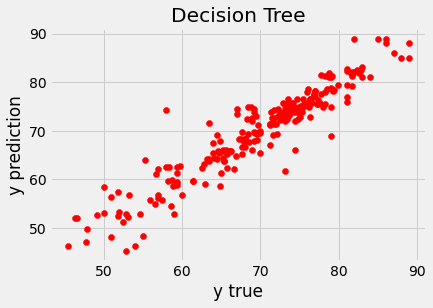

In [24]:
y_dt= DT_reg.predict(X_test)                       
plt.scatter(y_test,y_dt,color="red")
plt.xlabel("y true")
plt.ylabel("y prediction")
plt.title("Decision Tree")
plt.show()

In [25]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_dt))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_dt))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_dt)))
score=r2_score(y_test,y_dt)
print("Accuracy for our testing dataset: {:.3f}%".format(score*100) )

Mean Absolute Error:  1.9344869759606032
Mean Squared Error:  8.846258153579152
Root Mean Squared Error:  2.9742659856810305
Accuracy for our testing dataset: 89.000%


# Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

In [27]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg.fit(X_train,y_train)  
print(RF_reg.predict(X_test))           

C:\Users\Yogi\AppData\Local\Temp/ipykernel_30164/2756686259.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg.fit(X_train,y_train)


[73.722      78.411      70.69374795 80.404      58.654      53.964
 82.547      62.279      76.699      72.14       67.20049863 79.075
 52.248      81.718      71.87574795 67.655      75.855      56.363
 54.916      79.457      67.71324932 62.411      76.179      75.877
 65.72       56.221      81.835      50.076      64.047      87.936
 50.902      68.037      75.686      67.92924932 75.485      84.74
 59.658      53.869      77.315      64.406      75.003      72.65424932
 51.59       75.39       66.68824932 75.871      52.678      72.679
 66.241      76.292      69.85674795 63.268      68.189      73.341
 75.081      73.36       62.003      60.18       71.463      79.829
 73.569      65.38       73.938      76.12       72.528      76.061
 53.408      75.312      64.99224932 74.039      81.404      72.915
 69.85449863 87.13       74.255      68.24574795 72.46424932 69.837
 75.164      77.696      86.644      81.498      61.978      76.109
 57.872      72.431      67.968      55.225 

In [28]:
y_rf=RF_reg.predict(X_test)

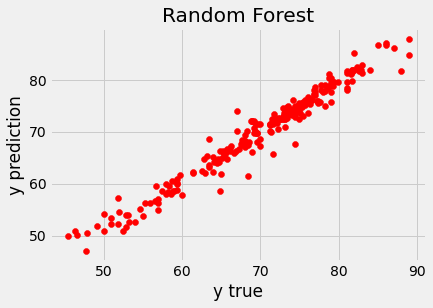

In [29]:

plt.scatter(y_test,y_rf, color="red")
plt.xlabel("y true")
plt.ylabel("y prediction")
plt.title("Random Forest")
plt.show()

In [30]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_rf))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_rf))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_rf)))

score=r2_score(y_test,y_rf)

print("Accuracy for our testing dataset: {:.3f}%".format(score*100) )

Mean Absolute Error:  1.1355145791485761
Mean Squared Error:  3.0353417396913502
Root Mean Squared Error:  1.7422232175273495
Accuracy for our testing dataset: 96.226%


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scores = cross_val_score(linear_reg, x, y,
                         scoring="neg_mean_squared_error",
                         cv=KFold(n_splits=5, random_state=1, shuffle=True) , n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
from numpy import absolute,mean
print("RMSE average: ", np.mean(rmse))

RMSE values:  [0. 0. 0. 0. 0.]
RMSE average:  2.697077762633384e-14


In [32]:

scores = cross_val_score(DT_reg, x, y,
                         scoring="neg_mean_squared_error",
                         cv=KFold(n_splits=5, random_state=1, shuffle=True) , n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

RMSE values:  [2.79 3.06 2.83 3.06 2.92]
RMSE average:  2.9320049166415414


In [33]:
scores = cross_val_score(RF_reg, x, y,
                         scoring="neg_mean_squared_error",
                         cv=KFold(n_splits=5, random_state=1, shuffle=True) , n_jobs=1)
print(scores)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

C:\Users\Yogi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yogi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yogi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Yogi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[-3.01120771 -4.43743541 -3.21790305 -2.81132312 -2.46932823]
RMSE values:  [1.74 2.11 1.79 1.68 1.57]
RMSE average:  1.7767532901698584
